In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import joblib



In [2]:
df = pd.read_csv(r"C:\Users\NandhaKishore\Desktop\Data_Science_project\DATA_SETS\weather_data.csv")
df.shape

(49, 3)

In [3]:
df.head()

,hours_sunlight,humidity_level,daily_temperature
0,10.5,65,22.3
1,9.2,70,21.0
2,7.8,80,18.5
3,6.4,90,17.2
4,8.1,75,19.4


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hours_sunlight     49 non-null     float64
 1   humidity_level     49 non-null     int64  
 2   daily_temperature  49 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


,hours_sunlight,humidity_level,daily_temperature
count,49.000000,49.000000,49.000000
mean,8.159184,75.510204,19.691837
std,1.783480,9.021092,2.458305
min,4.300000,60.000000,15.000000
25%,6.700000,69.000000,17.400000
50%,8.200000,75.000000,19.400000
75%,9.500000,84.000000,21.300000
max,11.200000,92.000000,24.300000


In [5]:
X = df[['hours_sunlight', 'humidity_level']]
y = df['daily_temperature']
print(X.shape)
print(y.shape)


(49, 2)
(49,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
print("Coefficient (Slope):", model.coef_)
print("Intercept:", model.intercept_)

Coefficient (Slope): [ 1.90967786 -0.45525461]
Intercept: 19.705128205128208


In [10]:
y_pred = model.predict(X_test_scaled)

In [11]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)


Model Evaluation Metrics:
MSE : 0.077483286984775
RMSE: 0.278358199061524
MAE : 0.22647875770223572
R2  : 0.9889189281241384


In [12]:
train_r2 = model.score(X_train_scaled, y_train)
test_r2 = model.score(X_test_scaled, y_test)

print("\nTrain R2 Score:", train_r2)
print("Test R2 Score :", test_r2)


Train R2 Score: 0.9845971106277869
Test R2 Score : 0.9889189281241384


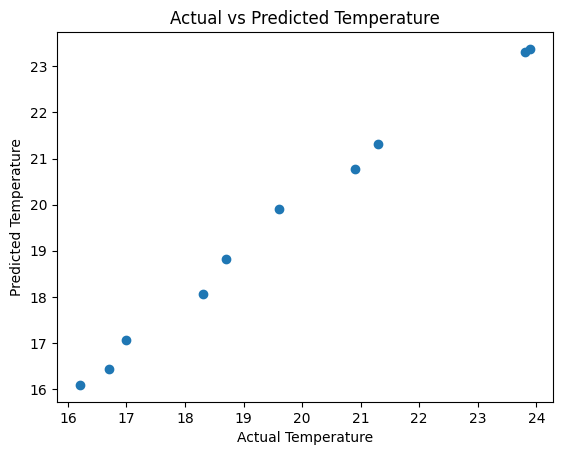

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

In [13]:
joblib.dump(model, "weather_model_multi.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model saved successfully!")

Model saved successfully!
